In [5]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [13]:
ds = xr.open_dataset('201909a/20190923_A15.nc')
print(ds.keys())

KeysView(<xarray.Dataset>
Dimensions:  (scan: 2546)
Coordinates:
  * scan     (scan) int64 0 1 2 3 4 5 6 7 ... 2539 2540 2541 2542 2543 2544 2545
Data variables:
    cond     (scan) float64 ...
    cond0    (scan) float64 ...
    temp     (scan) float64 ...
    pres     (scan) float64 ...
    O2       (scan) float64 ...
    O2sat    (scan) float64 ...
    Par      (scan) float64 ...
    Flu      (scan) float64 ...
    sal      (scan) float64 ...
    pden     (scan) float64 ...
    time     datetime64[ns] ...
Attributes:
    alongx:   27.81878187818782
    acrossx:  0.22128583592439058
    lat:      48.72196666666667
    lon:      -123.2594
    id:       A15
    header:   * Sea-Bird SBE19plus Data File:\n\n* FileName = C:\Users\Ocean ...)


<IPython.core.display.Javascript object>


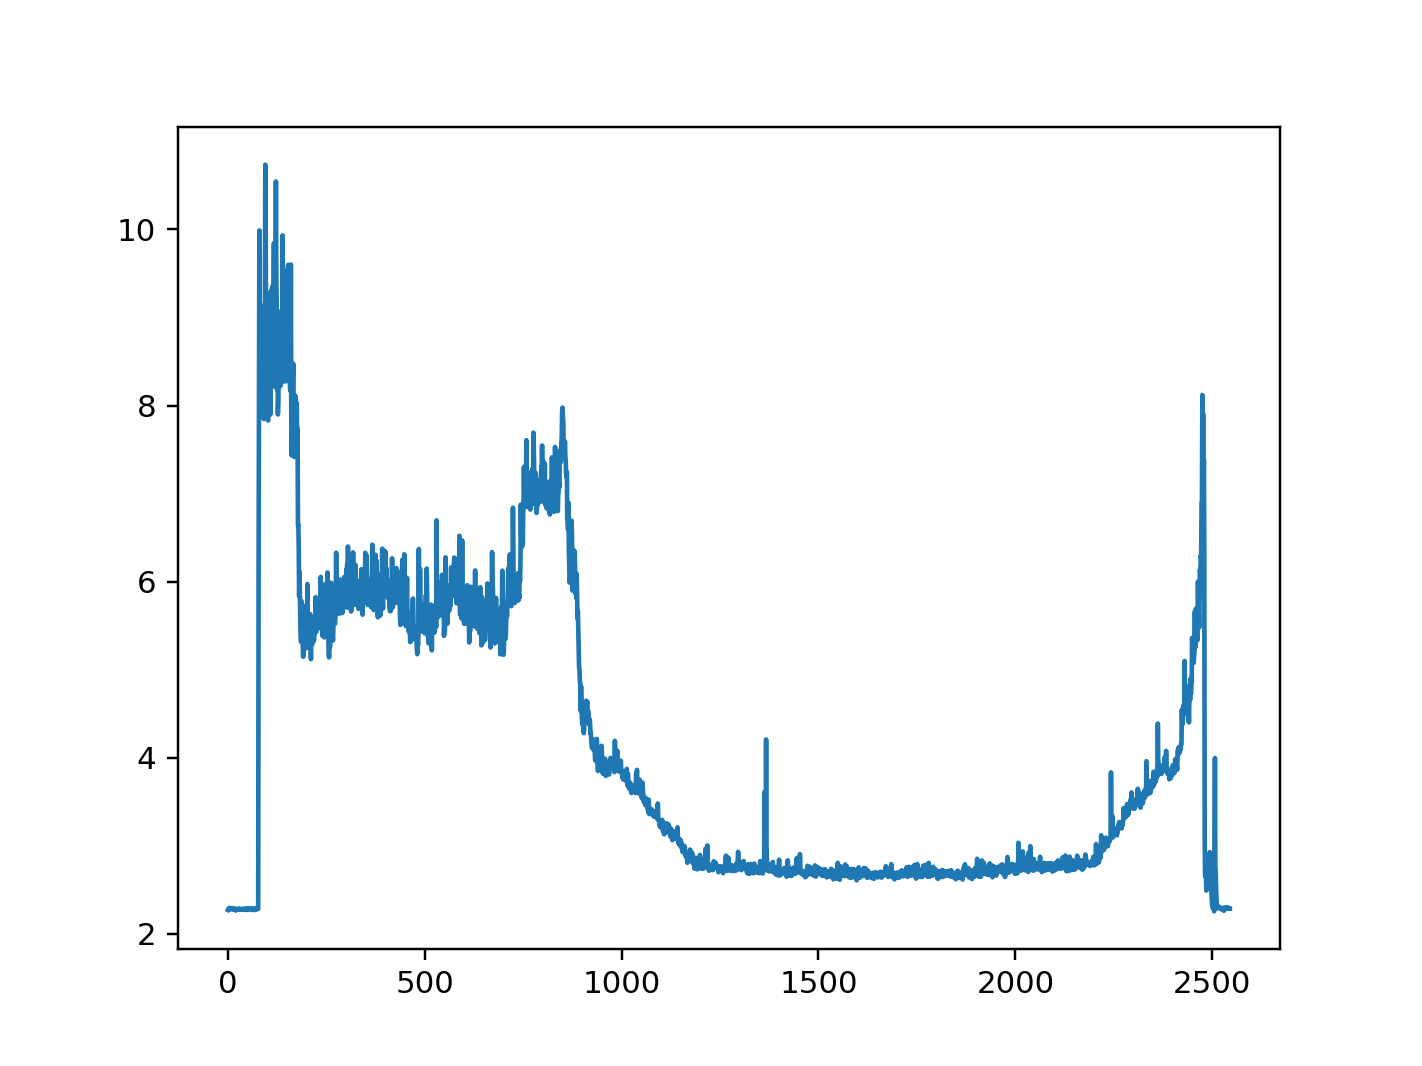

In [14]:
fig, ax = plt.subplots()
ax.plot(ds.Flu)

In [57]:
ind = np.where(ds.pres>20)[0][0]
start = ind
stop = ind
while (ds.pres[start-10] < ds.pres[start]):
    start = start-10

while (ds.pres[stop + 10] > ds.pres[stop]):
    stop = stop + 10

    
print(start, stop)
inds = range(start,stop)
ax.plot(inds, ds.pres[inds])


583 1583


In [4]:
ds.attrs.keys()
ds.attrs['lat']

47.446533333333335

In [5]:
for a in ds.keys():
    print(a)
    print(ds[a].dims == ('scan',))

cond
True
cond0
True
temp
True
pres
True
O2
True
O2sat
True
Par
True
Flu
True
sal
True
pden
True
time
False
scan
True


In [6]:
from jmkdata import bindata1d
zbins = np.arange(325)

temp = bindata1d(zbins, ds.pres[inds], ds.temp[inds])
print(temp)

NameError: name 'inds' is not defined

In [7]:
dinds = np.diff(inds)
contig = inds[np.where(dinds==1)[0]]


NameError: name 'inds' is not defined

<IPython.core.display.Javascript object>


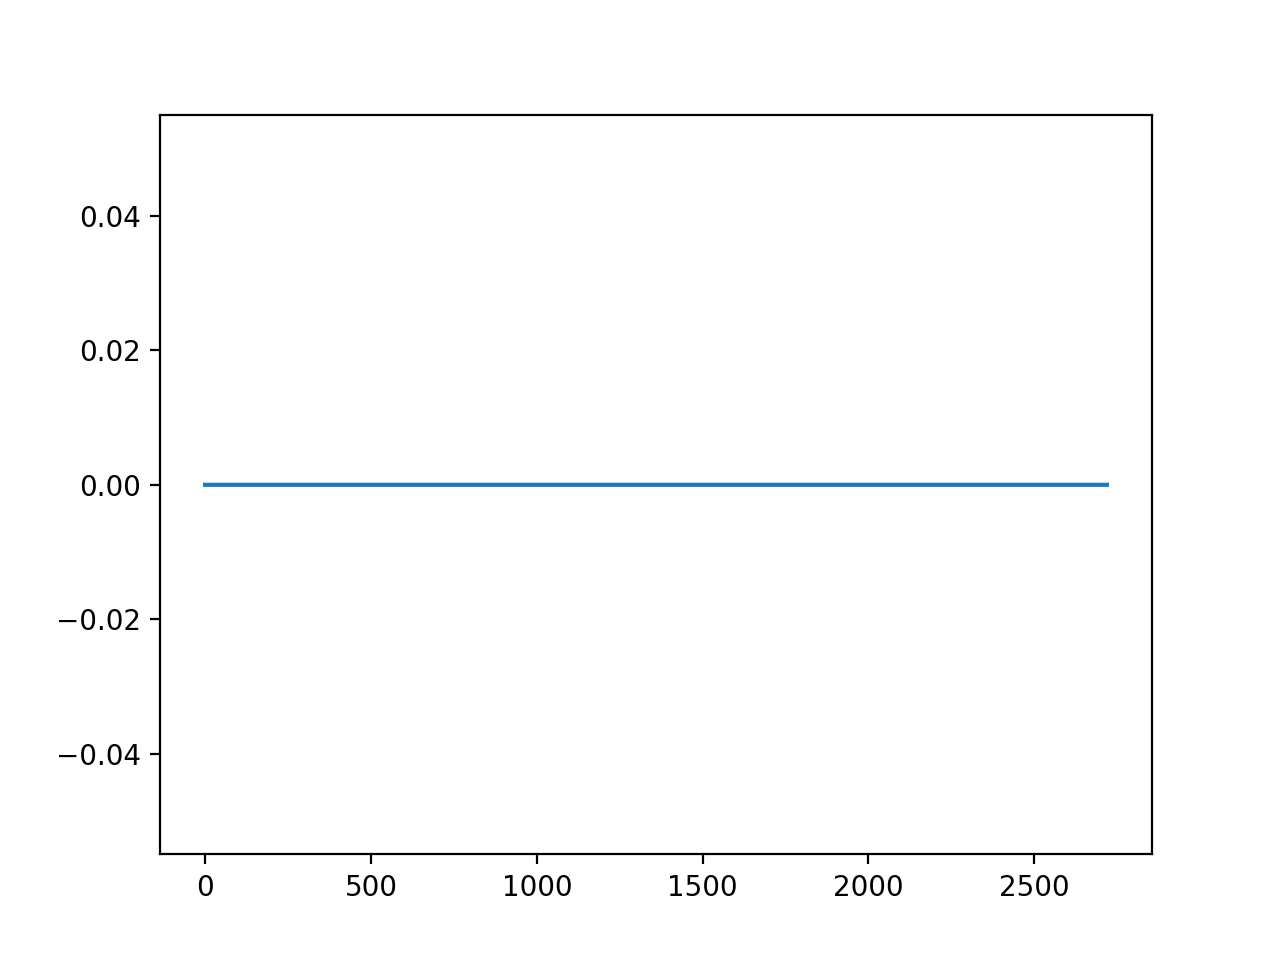

In [8]:
fig, ax = plt.subplots()
ax.plot((ds.pres[10:] - ds.pres[:-10]).values)

In [26]:
print(ds.pres[1000]-ds.pres[1000-10])

<xarray.DataArray 'pres' ()>
array(2.182246247074943)


<IPython.core.display.Javascript object>


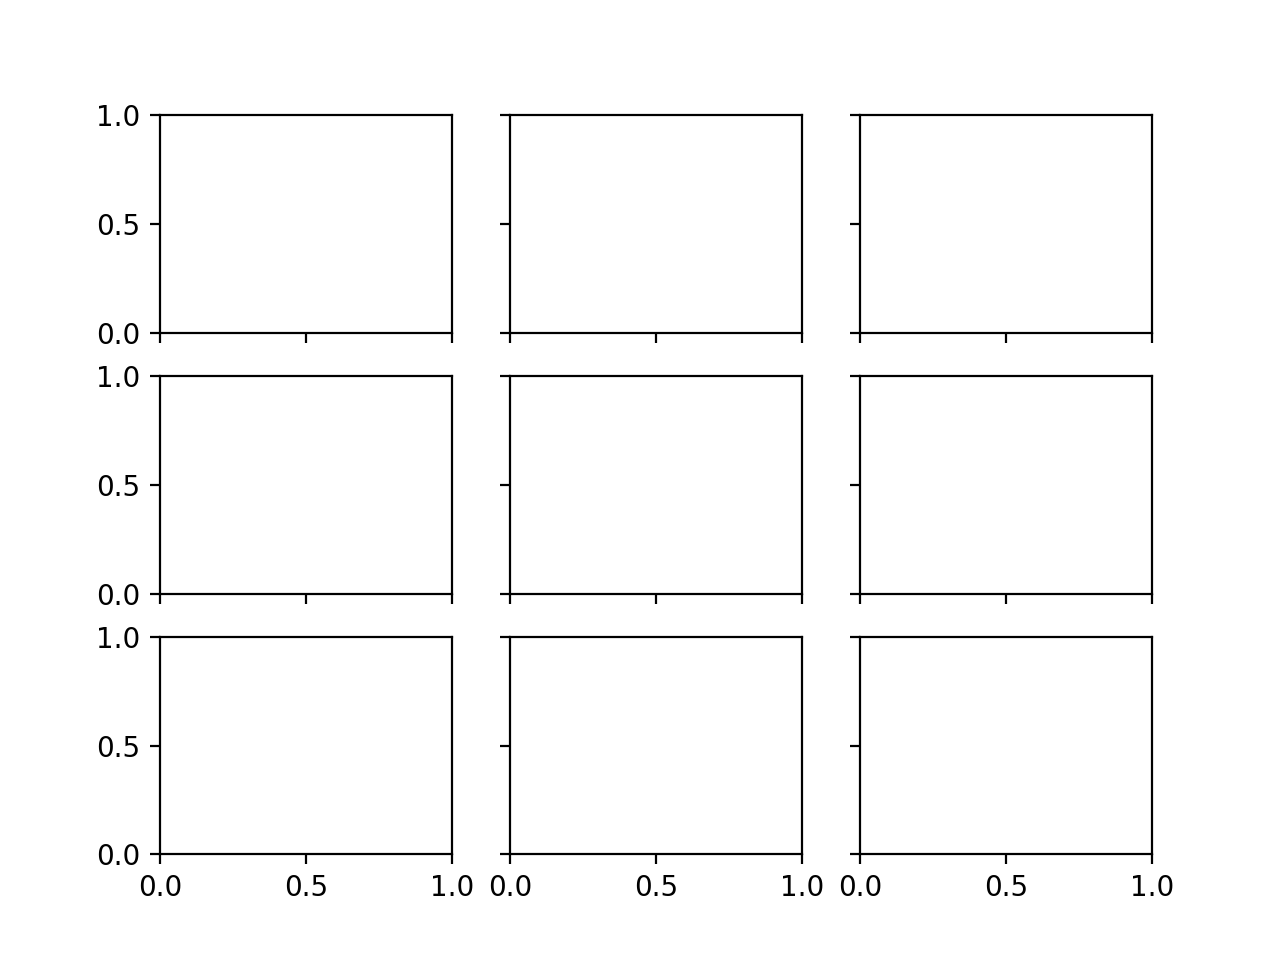

[]

In [9]:
fig, ax = plt.subplots(3,3)
plt.setp(ax[:,1:], 'yticklabels', '')
plt.setp(ax[:-1,:], 'xticklabels', '')

In [79]:
np.unique(np.diff([1.,2,4]))

array([ 1.,  2.])

In [106]:
points = np.array([[-123.241147, 48.720417],
[-123.338702, 48.766345],
[-123.418352, 48.722311],
[-123.469599, 48.705739],
[-123.5, 48.700530],
[-123.5            , 48.6418],
[-123.5, 48.5]])


In [107]:
lat0 = 48.7
lon0 = -123.5
xx = (points[:,0] - lon0)*np.cos(lat0 * np.pi / 180.) * 60. * 1.85  # km
yy = (points[:,1] - lat0)*60.*1.85     # km
print(len(xx))

7


In [108]:
def dist(x1,y1, x2,y2, x3,y3): # x3,y3 is the point
    px = x2-x1
    py = y2-y1

    dsq = px*px + py*py

    u =  ((x3 - x1) * px + (y3 - y1) * py) / dsq

    if u > 1:
        u = 1
    elif u < 0:
        u = 0

    x = x1 + u * px
    y = y1 + u * py

    dx = x - x3
    dy = y - y3

    dist = np.sqrt(dx*dx + dy*dy)

    return dist


In [109]:
ds = xr.open_dataset('201710/CtdGrid.nc')
lon = ds.lon.values
lat = ds.lat.values
print(lat)
x = (lon - lon0)*np.cos(lat0*np.pi/180.)*60.*1.852  
y = (lat - lat0)*60.*1.852  
print(ds.id)
print(ds.lat[8])
print(y)

[ 48.72301667  48.7365      48.7528      48.7682      48.74413333
  48.69106667  48.6979      48.70553333  48.6418      48.65596667
  48.66778333  48.67613333  48.7159      48.72286667  48.75161667
  48.74333333]
<xarray.DataArray 'id' (time: 16)>
array(['A1', 'A2', 'A3', 'A4', 'A5', 'S12', 'S12.25', 'S12.5', 'S4', 'S4.25W',
       'S45', 'S4.75', 'S5', 'S5.5', 'S6', 'S8'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2017-10-04T16:23:00 2017-10-04T16:48:00 ...
<xarray.DataArray 'lat' ()>
array(48.6418)
Coordinates:
    time     datetime64[ns] 2017-10-04T22:25:00
Attributes:
    units:    deg N
[ 2.557612  4.05588   5.867136  7.578384  4.904096 -0.992672 -0.233352
  0.614864 -6.467184 -4.892984 -3.579916 -2.652064  1.766808  2.540944
  5.735644  4.8152  ]


In [110]:
ind = np.zeros(len(x))
for j in range(len(x)):
    thedist = np.Inf
    for i in range(len(xx)-1):
        dd = dist(xx[i], yy[i], xx[i+1], yy[i+1], x[j], y[j])
        if dd < thedist:
            thedist = dd
            ind[j] = i
print(ind)

[ 0.  0.  0.  1.  1.  4.  3.  3.  5.  4.  4.  4.  2.  2.  0.  1.]


<IPython.core.display.Javascript object>


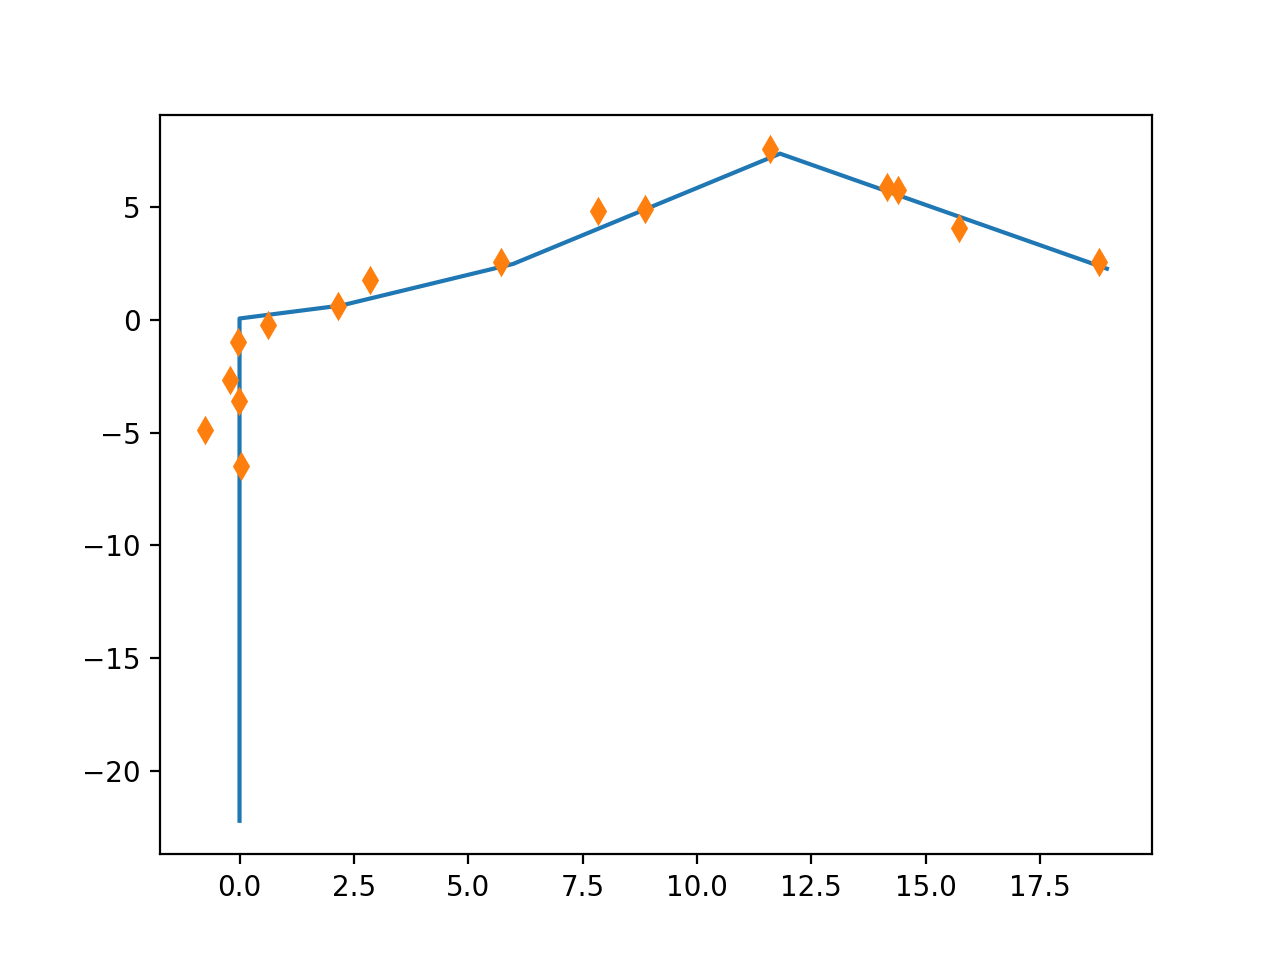

In [111]:
fig, ax = plt.subplots()
ax.plot(xx, yy)
ax.plot(x, y, 'd')


In [112]:
distline = np.cumsum(np.sqrt(np.diff(xx)**2 + np.diff(yy)**2))
distline = np.append([0.], distline)
print(distline)

[  0.           8.77882837  16.39063415  20.57142178  22.8724341
  29.3914641   45.1312641 ]


In [118]:
alongx = x * 0.
for i in range(len(x)):
    # get the distance along the line....
    indd = int(ind[i])
    x0 = xx[indd]
    x1 = xx[indd+1]
    y0 = yy[indd]
    y1 = yy[indd+1]
    
    xp = x[i] - x0
    yp = y[i] - y0
    
    dot = xp * (x1 - x0) + yp * (y1 - y0)
    dot = dot / np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
    print(dot)
    alongx[i] = dot + distline[indd]
    
    
   

0.309892011267
3.66572191703
6.00122746594
0.026908339482
3.83746903767
1.051502
1.78169674877
0.0671977232248
0.006984
4.951814
3.638746
2.710894
3.12509411313
0.207199294401
5.72485270193
4.68915078884


In [119]:
alongx = distline[5] - alongx

In [120]:
print(alongx)

[  2.90815721e+01   2.57257422e+01   2.33902366e+01   2.05857274e+01
   1.67751667e+01   5.46752800e+00   7.03834557e+00   8.75284460e+00
  -6.98400000e-03   1.56721600e+00   2.88028400e+00   3.80813600e+00
   9.87573583e+00   1.27936307e+01   2.36666114e+01   1.59234849e+01]


In [133]:
for i in range(len(ds.id)):
    print(ds.id[i].values, ds.alongx[i].values)

A1 29.066655851487912
A2 25.714449952097983
A3 23.38146654741644
A4 20.570867164559054
A5 16.764421542720697
S12 5.468599999999348
S12.25 7.037768792388061
S12.5 8.750416307103919
S4 0.0
S4.25W 1.5724999999993585
S45 2.884149999999522
S4.75 3.810999999999531
S5 9.872133245729959
S5.5 12.786876990143345
S6 23.65754285055113
S8 15.913659534261857


<xarray.Dataset>
Dimensions:  (alongx: 16, depths: 324, time: 16)
Coordinates:
  * depths   (depths) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * time     (time) datetime64[ns] 2017-10-04T16:23:00 2017-10-04T16:48:00 ...
  * alongx   (alongx) float64 29.07 25.71 23.38 20.57 16.76 5.469 7.038 8.75 ...
Data variables:
    cond     (depths, time) float64 3.282 3.335 3.358 3.342 3.349 3.45 3.422 ...
    cond0    (depths, time) float64 3.283 3.335 3.358 3.343 3.349 3.45 3.422 ...
    temp     (depths, time) float64 11.86 11.13 10.75 11.48 11.51 12.54 ...
    pres     (depths, time) float64 0.9215 0.961 0.9714 0.9371 0.9441 0.9012 ...
    O2       (depths, time) float64 161.8 139.7 117.5 156.2 137.2 246.4 ...
    O2sat    (depths, time) float64 6.333 6.391 6.423 6.351 6.345 6.2 6.237 ...
    Par      (depths, time) float64 2.619e+10 2.714e+10 3.711e+10 2.736e+10 ...
    Flu      (depths, time) float64 8.492 9.031 3.757 6.965 5.188 42.36 45.8 ...
    sal      (depths, time) fl